In [1]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [3]:
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SECRET = os.getenv('PLAID_SBX_SECRET_KEY')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')

# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to plaid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [4]:
INSTITUTION_ID = "ins_109508"

In [5]:
# YOUR CODE HERE
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SECRET, public_key=PLAID_PUBLIC_KEY, environment='sandbox')

### 2. Generate a public token

In [6]:
# YOUR CODE HERE
# Create public token to be exchanged for institution access token
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])



### 3. Exchange the public token for an access token

In [7]:
# YOUR CODE HERE
# Exchange public token for access token
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])
# Store access token as variable
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [8]:
# YOUR CODE HERE
client.Accounts.get(access_token)

{'accounts': [{'account_id': '41P4PojrRXSQVyGxbnr3i5RjAjevDacd7bkQW',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'NJ9d95bREpiaQ8nKkle1fjZrvr3pQ9fWm6x4k',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'PJw4w5Xblgiw4LeJx9oKFkdz8zZpEeU7Z6JPm',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [9]:
# YOUR CODE HERE

start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now()) 
transactions_response = client.Transactions.get(access_token, start_date, end_date)

print(json.dumps(transactions_response['transactions'],indent=4, sort_keys=True))

[
    {
        "account_id": "jvadalXbWxFmERd5zpGacrEd7d9Aopt1qWwVz",
        "account_owner": null,
        "amount": 500,
        "authorized_date": null,
        "category": [
            "Food and Drink",
            "Restaurants"
        ],
        "category_id": "13005000",
        "date": "2020-04-25",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "name": "Tectra Inc",
        "payment_channel": "in store",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "reference_number": null
        },
        "pending": false,
    

### 2. Print the categories for each transaction

In [10]:
# YOUR CODE HERE
for transaction in transactions_response['transactions']:
    print(transaction['category'])



['Food and Drink', 'Restaurants']
['Payment']
['Food and Drink', 'Restaurants', 'Fast Food']
['Shops', 'Sporting Goods']
['Payment', 'Credit Card']
['Travel', 'Taxi']
['Transfer', 'Debit']
['Transfer', 'Deposit']
['Recreation', 'Gyms and Fitness Centers']
['Travel', 'Airlines and Aviation Services']
['Food and Drink', 'Restaurants', 'Fast Food']
['Food and Drink', 'Restaurants', 'Coffee Shop']
['Food and Drink', 'Restaurants']
['Transfer', 'Credit']
['Travel', 'Airlines and Aviation Services']
['Travel', 'Taxi']
['Food and Drink', 'Restaurants']
['Payment']
['Food and Drink', 'Restaurants', 'Fast Food']
['Shops', 'Sporting Goods']
['Payment', 'Credit Card']
['Travel', 'Taxi']
['Transfer', 'Debit']
['Transfer', 'Deposit']
['Recreation', 'Gyms and Fitness Centers']
['Travel', 'Airlines and Aviation Services']
['Food and Drink', 'Restaurants', 'Fast Food']
['Food and Drink', 'Restaurants', 'Coffee Shop']
['Food and Drink', 'Restaurants']
['Transfer', 'Credit']
['Travel', 'Airlines and Avi

### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [11]:
# YOUR CODE HERE

new_df = pd.DataFrame(columns=['date', 'name','amount', 'category'])

for transaction in transactions_response['transactions']:
    new_df = new_df.append({'date':transaction['date'], 'name': transaction['name'], 'amount':transaction['amount'],
                  'category': transaction['category'][0]},ignore_index=True)
new_df

,date,name,amount,category
0,2020-04-25,Tectra Inc,500,Food and Drink
1,2020-04-24,AUTOMATIC PAYMENT - THANK,2078.5,Payment
2,2020-04-24,KFC,500,Food and Drink
3,2020-04-24,Madison Bicycle Shop,500,Shops
4,2020-04-15,CREDIT CARD 3333 PAYMENT *//,25,Payment
5,2020-04-15,Uber,5.4,Travel
6,2020-04-14,ACH Electronic CreditGUSTO PAY 123456,5850,Transfer
7,2020-04-14,CD DEPOSIT .INITIAL.,1000,Transfer
8,2020-04-13,Touchstone Climbing,78.5,Recreation
9,2020-04-13,United Airlines,-500,Travel


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [12]:
new_df['date'] = pd.to_datetime(new_df['date'])
#new_df.set_index('date',inplace=True) 

In [13]:
new_df.dtypes

date        datetime64[ns]
name                object
amount              object
category            object
dtype: object

---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [14]:
# YOUR CODE HERE
income = client.Income.get(access_token)
income

{'income': {'income_streams': [{'confidence': 0.99,
    'days': 690,
    'monthly_income': 500,
    'name': 'UNITED AIRLINES'}],
  'last_year_income': 6000,
  'last_year_income_before_tax': 7285,
  'max_number_of_overlapping_income_streams': 1,
  'number_of_income_streams': 1,
  'projected_yearly_income': 6085,
  'projected_yearly_income_before_tax': 7389},
 'request_id': 'Ij0ZYbeZOUCk64J'}

In [15]:
previous_yr_income = income ['income']['last_year_income_before_tax']
current_income = income ['income']['income_streams'][0]['monthly_income']
projected_yearly_income = income ['income']['projected_yearly_income_before_tax']
print(f"Last Year's Income Before Tax: ${previous_yr_income}")
print(f"Current Monthly Income: ${current_income}")
print(f"Projected Year's Income Before Tax: ${projected_yearly_income}")


Last Year's Income Before Tax: $7285
Current Monthly Income: $500
Projected Year's Income Before Tax: $7389


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calculate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

In [16]:
# YOUR CODE HERE
# Calculate the total spending per category and print the results
total_spending = new_df.groupby(["category"])[["amount"]].sum()
total_spending

,amount
category,
Food and Drink,3817.19
Payment,6310.50
Recreation,235.50
Shops,1500.00
Transfer,20537.34
Travel,35.19


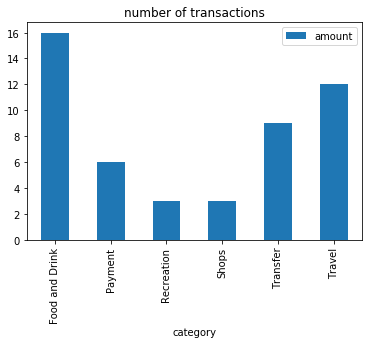

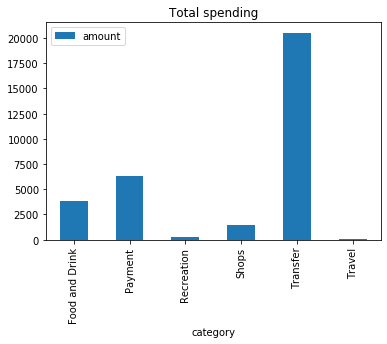

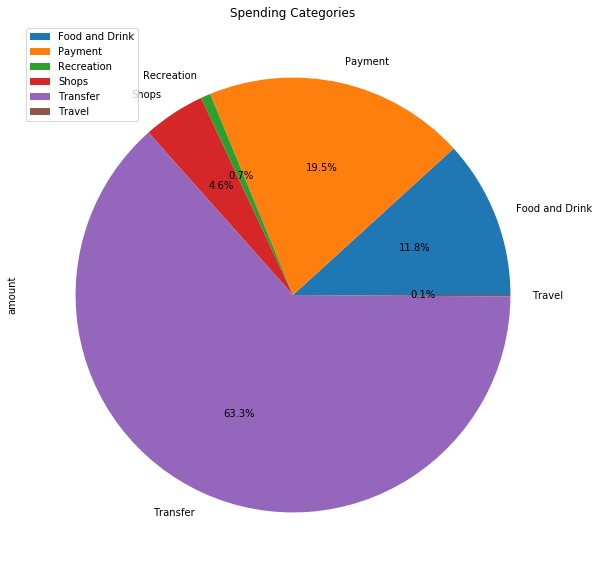

In [23]:
#Generate a bar chart with the number of transactions for each category 
new_df.groupby(["category"])[["amount"]].count().plot(kind = 'bar', title='number of transactions')
total_spending.plot(title= 'Total spending', kind = 'bar')
total_spending.plot.pie(y='amount', autopct='%1.1f%%', figsize=(20, 10), title = 'Spending Categories')

### Calculate the expenses per month

In [18]:
# YOUR CODE HERE
new_df['month'] = pd.DatetimeIndex(new_df['date']).month
expenses_month = new_df.groupby(["month"])[["amount"]].sum()
expenses_month.head()


,amount
month,
1,1006.33
2,10145.24
3,11145.24
4,10138.91


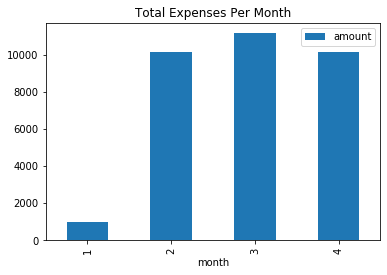

In [19]:
expenses_month.plot(kind = 'bar', title = 'Total Expenses Per Month')